In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from scipy.linalg import orthogonal_procrustes
from matplotlib import pyplot as plt

from scipy.spatial import procrustes

In [3]:
def procrustes(X_src, Y_tgt):
    U, s, V = np.linalg.svd(np.dot(Y_tgt.T, X_src))
    return np.dot(U, V)


In [4]:
X = np.random.rand(2,2)
Y = np.random.rand(2,2) + 2

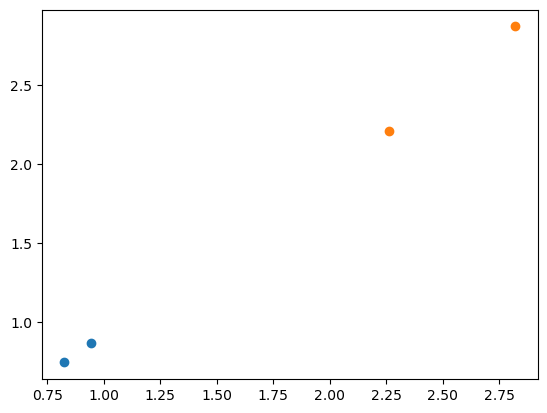

In [5]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(Y[:, 0], Y[:, 1])
plt.show()

In [6]:
W = procrustes(X,Y)
W.shape


(2, 2)

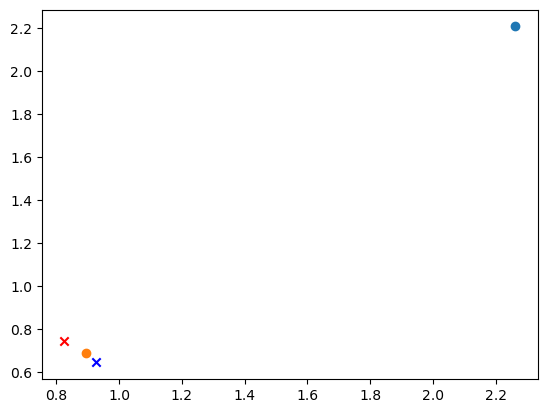

In [7]:
#Map X to Y using procustes
X1 = np.array([X[0, 0], X[0, 1]])
plt.scatter(X1[0],X1[1],marker='x',color='r')
X2 = np.array([X1[0]+0.1, X1[1]-0.1])
plt.scatter(X2[0],X2[1],marker='x',color='b')

plt.scatter(Y[0, 0], Y[0, 1])
# Y2 = np.dot(X2,W)
Y2 = np.dot(W, X2)
plt.scatter(Y2[0], Y2[1])
plt.show()


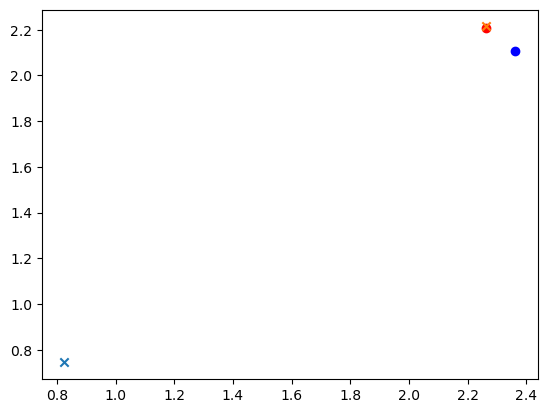

In [8]:
#Map Y to X using procustes
plt.scatter(Y[0, 0], Y[0, 1], marker='o', color='r')
Y2 = np.array([Y[0, 0]+0.1, Y[0, 1]-0.1])
plt.scatter(Y2[0], Y2[1], marker='o', color='b')

plt.scatter(X[0, 0], X[0, 1], marker='x')
X2 = np.dot(W,Y2)
# Y2 = np.dot(W, X2)
plt.scatter(X2[0], X2[1], marker='x')
plt.show()


In [9]:
W


array([[ 0.99891757, -0.04651554],
       [ 0.04651554,  0.99891757]])

In [10]:
R, sc = orthogonal_procrustes(Y, X)

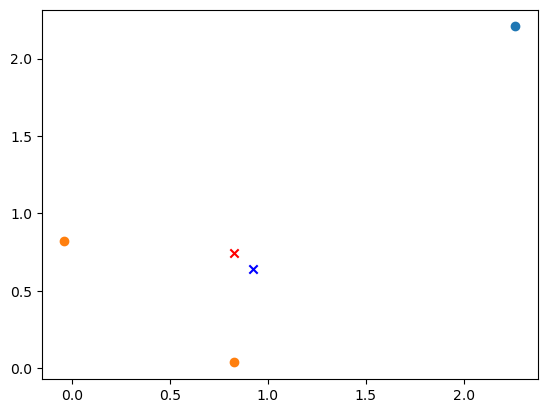

In [11]:
plt.scatter(X[0, 0], X[0, 1], marker='x', color='r')
X2 = np.array([X[0, 0]+0.1, X[0, 1]-0.1])
plt.scatter(X2[0], X2[1], marker='x', color='b')

plt.scatter(Y[0, 0], Y[0, 1])
Y2 = np.dot(R, np.array(X[0, 0], X[0, 1]))
plt.scatter(Y2[0], Y2[1])
plt.show()


In [12]:
from get_align_procustes import Wasserstein_Procrustes_Alignment,parse_arguments
import argparse

In [13]:
parser = argparse.ArgumentParser(
    description="Embedding Alignment using Wasserstein Procrustes or Procrustes"
)
parser = parse_arguments(parser)


usage: ipykernel_launcher.py [-h] [--emb_src EMB_SRC] [--emb_tgt EMB_TGT]
                             [--label_src LABEL_SRC] [--label_tgt LABEL_TGT]
                             [--wp] [--rotation ROTATION] [--seed SEED]
                             [--nepoch NEPOCH] [--niter NITER] [--bsz BSZ]
                             [--lda] [--pca] [--pca_n_dim PCA_N_DIM]
                             [--pca_load_path PCA_LOAD_PATH] [--test]
                             [--kmeans]
                             [--kmeans_num_cluster KMEANS_NUM_CLUSTER]
                             [--top_k] [--lr LR] [--nmax NMAX] [--reg REG]
                             [--noverbose]
ipykernel_launcher.py: error: unrecognized arguments: --ip=127.0.0.1 --stdin=9003 --control=9001 --hb=9000 --Session.signature_scheme="hmac-sha256" --Session.key=b"8280d308-c0e7-4f6e-a6e0-bf1be8d6aff1" --shell=9002 --transport="tcp" --iopub=9004 --f=/home/julio/.local/share/jupyter/runtime/kernel-v2-7419511FVEImdIOqY.json


SystemExit: 2

In [22]:

args =parser.parse_args('')
args

Namespace(bsz=40, emb_src=None, emb_tgt=None, kmeans=False, kmeans_num_cluster=-1, label_src=None, label_tgt=None, lda=False, lr=50, nepoch=15, niter=1024, nmax=-1, noverbose=False, pca=False, pca_load_path=None, pca_n_dim=10, reg=0.05, rotation=None, seed=1111, test=False, top_k=False, wp=False)

In [23]:
a = np.array([[2, 2], [1, 2], [1, 1], [2, 1]])

b = np.array([[2, -4], [4, -4], [4, -6], [2, -6]])

# R,scale = orthogonal_procrustes(a, b, check_finite=True)
# R = procrustes(a, b)


In [29]:
a = np.random.rand(40, 2)
b = np.random.rand(40, 2) + 2


In [38]:

R = Wasserstein_Procrustes_Alignment(args, X, Y)


In [39]:
args

Namespace(bsz=40, emb_src=None, emb_tgt=None, kmeans=False, kmeans_num_cluster=-1, label_src=None, label_tgt=None, lda=False, lr=50, nepoch=15, niter=1024, nmax=-1, noverbose=False, pca=False, pca_load_path=None, pca_n_dim=10, reg=0.05, rotation=None, seed=1111, test=False, top_k=False, wp=False)

In [40]:
np.dot([2,1],R)

array([0.17331032, 2.2293415 ])

In [41]:
a1 = a[:,0]
a2 = a[:, 1]

b1 = b[:,0]
b2 = b[:, 1]


In [42]:
a.shape

(40, 2)

In [43]:
mapa = np.array([ np.dot(a[i],R) for i in range(a.shape[0])])

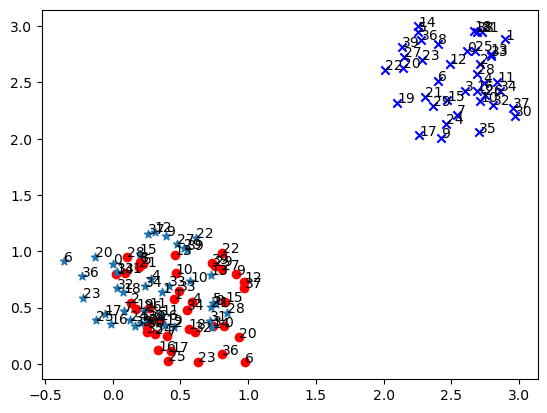

In [44]:
# X2 = np.array([X[0, 0]+0.1, X[0, 1]-0.1])
plt.scatter(a1, a2,color = 'r')
for i in range(a.shape[0]):
    plt.annotate(str(i), (a1[i], a2[i]))

plt.scatter(b1, b2, marker='x', color='b')
for i in range(a.shape[0]):
    plt.annotate(str(i), (b1[i], b2[i]))
    
plt.scatter(mapa[:,0],mapa[:,1], marker='*')
for i in range(a.shape[0]):
    plt.annotate(str(i), (mapa[i,0], mapa[i,1]))
# plt.scatter(Y[0, 0], Y[0, 1])
# Y2 = np.dot(R, np.array(X[0, 0], X[0, 1]))
# plt.scatter(Y2[0], Y2[1])
plt.show()
